## **Dataviz com Seaborn**

Sejam todos bem-vindos, a partir deste momento iremos entender como a biblioteca Seaborn funciona e como trabalhar com ela. Abaixo disponibilizo os sumários para caso tenha conhecimento prévio dos tópicos possa buscar o que lhe interessa de forma mais dinâmica.

### **Sumário**
* Introdução ao Seaborn
* Como preparar os dados?
* Alguns tipos de gráficos e funcionalidades
* Estilização gráfica, o que pode ser feito?

## **Introdução ao Seaborn**

Criada por Michael Waskom, é uma biblioteca de visualização de dados mais sofisticada e que tem integração direta com Matplotlib, essa biblioteca tem como objetivo a criação de gráficos de alto nível, sendo também uma biblioteca de visualização gráfica de alto nível se comparada ao Matplotlib, o que a torna mais fácil de utilizar.

## **Como preparar os dados?**

É interessante mencionar que o Seaborn funciona melhor com 'Tidy Data', e o que seria exatamente este conceito? Basicamente quando geramos um gráfico temos os nossos eixos X e Y, dos quais precisam dispor duas colunas em específico.

Geralmente seguindo por esse comportamento

* Eixo X: Dados categoricos, temporais.
* Eixo Y: Dados numéricos.

Abaixo disponibilizo um exemplo de como seria a disposição dos dados do tipo 'Long Data' e 'Tidy Data', aos quais irá auxiliar no entendimento de como a biblioteca realiza a leitura dos nossos dados.

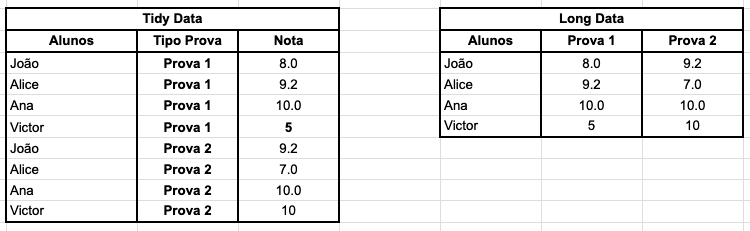

Então se por algum acaso eu tenho um DataFrame que se comporta como um Long Data, eu preciso otimiza-lo para que se pareça com o exemplo de Tidy Data.

Logo, aproveitando a criação deste exemplo em imagem, passarei a versão 'Long Data' para um DataFrame em Pandas, para então sermos capaz de trabalharmos e prepararmos esse dado para visualizações gráficas a posteriori.

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt #Apesar de vir do Matplotlib, é uma biblioteca auxiliar que nos permitirá editar nossos gráficos mais facilmente, visto que Seaborn integra com a biblioteca.
x = ['Carlos', 'Julia', 'Marcos', 'Ana', 'José', 'Clara', 'Josefa', 'Jessica', 'Marienne', 'Florisvaldo', 'Anacleuza', 'Dona Florinda', 'Chaves']

dicionario = {
    'Nome_Aluno' : x,
    'Prova_1' : np.random.uniform(low = 0, high = 10.0, size = len(x)).round(1),
    'Prova_2' : np.random.uniform(low = 2, high = 10.0, size = len(x)).round(1),
    'Prova_3' : np.random.uniform(low = 4, high = 10.0, size = len(x)).round(1),
    'Prova_4' : np.random.uniform(low = 6, high = 10.0, size = len(x)).round(1)
}

long_df = pd.DataFrame(dicionario)
long_df.head(2)

,Nome_Aluno,Prova_1,Prova_2,Prova_3,Prova_4
0,Carlos,8.2,8.9,9.6,9.1
1,Julia,9.7,6.6,5.5,8.4


A partir de agora possuimos um dataframe que está no formato que o Seaborn não consegue ter uma performance tão boa. E para resolver este problema é bem simples, podemos estar realizando o tratamento destes dados com Pandas e então ofertando para o Seaborn o dado pronto para utilização, desta forma, temos uma maneira muito simples de tratar esse dado.

In [98]:
pandas = long_df.copy()
pandas = pandas.melt(
    id_vars = ['Nome_Aluno'],
    var_name = 'Unidade',
    value_name = 'Nota'
)

pandas.sample(3)

,Nome_Aluno,Unidade,Nota
9,Florisvaldo,Prova_1,5.5
14,Julia,Prova_2,6.6
30,José,Prova_3,8.6


## **Alguns tipos de gráficos e funcionalidades**

Ao entrar neste tópico abordaremos os gráficos mais utilizados e outros que fazem a diferença ter uma base de conhecimento sobre, contudo, não haverá dissertação ampla sobre todos os gráficos que a biblioteca propõe pelo fato de ser algo muito extenso, contudo para aqueles que quiserem se aprofundar e conhecer os outros tipos de gráficos que conseguimos formular no Seaborn, basta clicar [aqui](https://seaborn.pydata.org/examples/index.html) para ser direcionado a documentação.

É importante mencionar também, que os gráficos não terão edições para facilitar o aprendizado, e então somente após a finalização deste tópico entraremos a fundo nesse tema e então dissertar sobre o mesmo.

### Gráfico de Barras

Os gráficos de barras são muito utilizados no cotidiano de analistas e são muito bons para mostrar a evolução de métricas ao longo do tempo, seja esta marcada por estabilidade, quedas ou incrementos exponenciais. Sendo este gráfico similar ao de linhas.

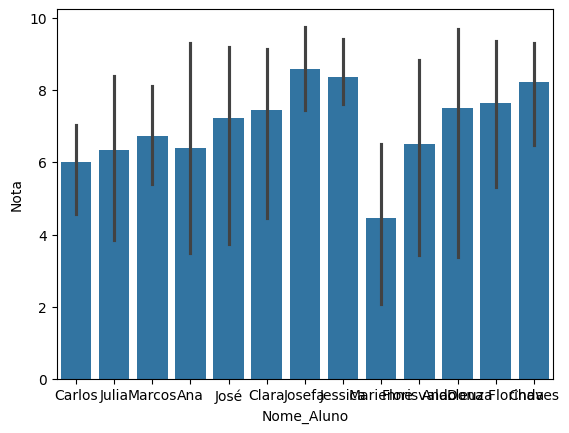

In [58]:
x = sns.barplot(data = pandas, x = 'Nome_Aluno', y = 'Nota') #Aqui temos alguns parâmetros para gerar um gráfico de barra e a função responsável, sns.barplot()


### Gráfico de Caixas

O gráfico de caixas é um grande salvador da pátria para muitos, mas antes de iniciar a explicação, iremos criar primeiro a visualização.


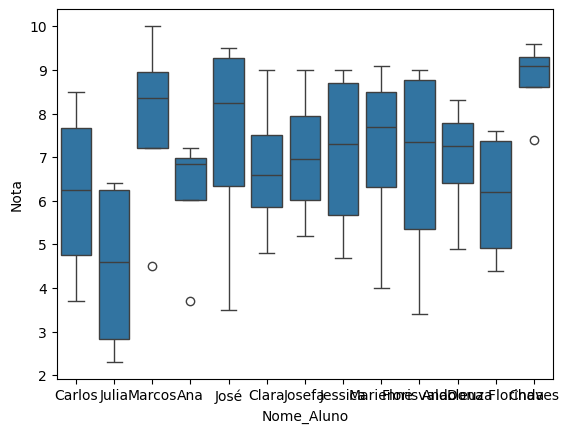

In [23]:
x = sns.boxplot(data = pandas, x = 'Nome_Aluno', y = 'Nota')

Então, basicamente olhando de maneira unitária para o eixo X onde temos o valor 'Carlos', temos uma caixa que é dividida por uma linha central e que possui duas linhas saindo de dentro dessa caixa. Agora explicando por parte temos:

* A **linha do meio:** Representa a Mediana ou segundo quartil.
* **O topo da caixa:** Representa o terceiro quartil, onde 75% dos dados são menores que o valor presente nesta seção.
* **O fundo da caixa:** Representa o primeiro quartil, onde 25% dos dados são menores que o valor presente nesta seção.
* **A caixa completa:** Representa o intervalo interquartil (IQR), representado pelo terceiro quartil subtraído ao primeiro, aqui obtemos o resultado dos 50%.
* **Bigode (Whiskers):** Representam os dados que estão fora das representações da caixa e que ainda assim são considerados normais, desde que eles não passem do resultado das seguintes fórmulas:
  * **Bigode inferior:** Q1 - (1.5 * IQR)
  * **Bigode superior:** Q3 + (1.5 * IQR)
* **Bolinhas (Outliers):** São consideradas os Outliers, eles estão fora da curva, sendo considerados anomalias estatísticas.




E com estas informações, percebemos o quanto a Boxplot pode nos ajudar numa análise dos dados, e também o quanto de informações eles podem acabar trazendo e desviando nosso foco de atenção, o que faz com que sempre haja uma advertência.

**OBS:** Sempre escolha o gráfico que melhor transmite a informação, priorizando sempre significado a estetica.

### Gráfico de Dispersão

Os gráficos de dispersão nos auxiliam a entender como duas variáveis distintas e de preferência contínuas se relacionam entre si, permitindo que identifiquemos padrões, correlações e também outliers. No exemplo abaixo utilizaremos de outro dataset para conseguir extrair o melhor possível deste tipo de gráfico.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


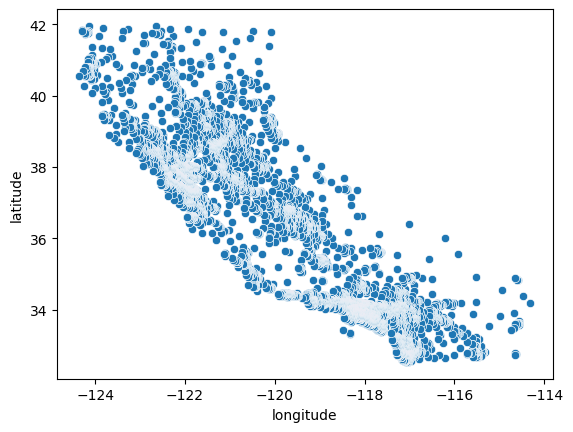

In [48]:
california_houses = pd.read_csv(r'/content/sample_data/california_housing_train.csv')
sns.scatterplot(data = california_houses, x = 'longitude', y = 'latitude')
california_houses.info()

No gráfico acima vemos a relação que a variável longitude tem com a latitude, como estamos falando de geolocalização, a ideia é que onde há área habitável hajam mais valores que em áreas inabitáveis.

### Gráfico de Distribuição

Os gráficos de distribuição nos auxiliam a entender como nossa variável se comporta ao longo de um intervalo, como por exemplo, queremos entender a renda mensal das famílias brasileiras de acordo com sua região, e então a partir disto conseguimos ter uma visão das concentrações de renda com base na região.

Contudo, saindo das ideias e indo para a prática, com o Dataset utilizado anteriormente conseguimos ver como o dado dos valores de compra em California se comportam em nosso conjunto de dados.

<Axes: xlabel='housing_median_age', ylabel='Count'>

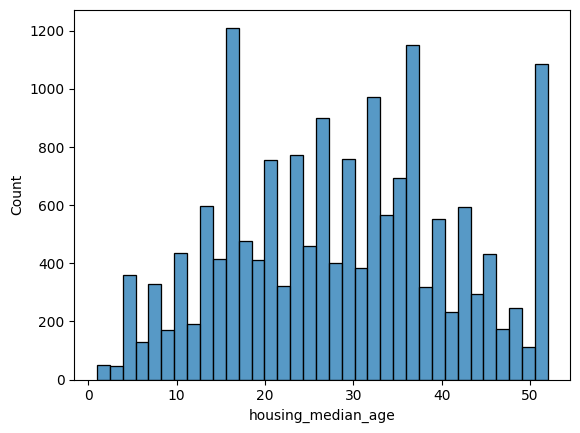

In [54]:
sns.histplot(data = california_houses, x = 'housing_median_age')

### Mapas de Calor

Os mapas de calor são gráficos essenciais na ciência de dados, principalmente pelo fato de que medem a correlação entre os dados presentes no nosso dataset. Isso nos permite entender se uma variável X pode impactar diretamente nos resultados de uma variável Y, contudo é sempre importante reiterar que a correlação nem sempre indica causalidade.

In [56]:
#Para gerar mapas de calor, precisamos usar uma função nativa do Pandas, que modifica completamente nosso dado, vamos ver o comportamento a seguir.
heatmap = california_houses.corr()
heatmap
#É importante ressaltar que por padrão usa-se a fórmula da Correlação de Pearson ao chamarmos a função .corr() sem parâmetros.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


<Axes: >

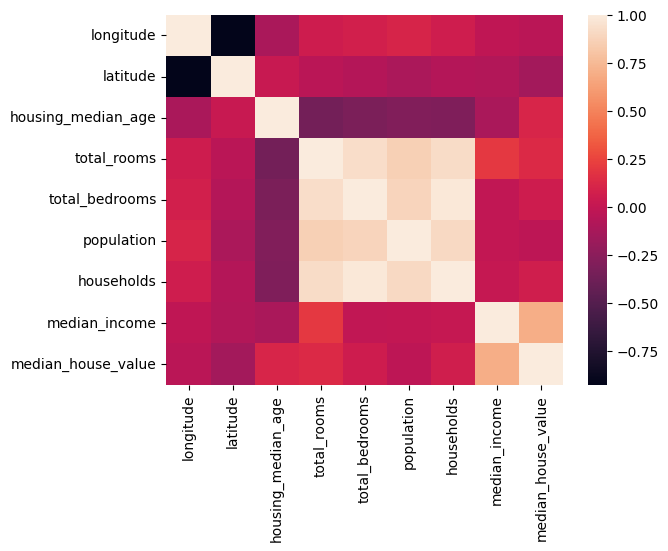

In [57]:
sns.heatmap(data = heatmap)

Ainda sobre o mapa de calor, ao lado direito vemos uma barra que vai do 1.00 ao -1.00

* 1.00: Correlação perfeita.
* 0.00: Não há correlação.
* -1.00: Correlação negativa perfeita.

Ou seja, se a renda tem correlação perfeita com o valor da casa, significa que se a renda aumentar o valor da casa também aumentará.

## **Estilização gráfica, o que pode ser feito?**

Se eu pudesse resumir tudo o que pode ser feito dentro do Seaborn para estilização gráfica, eu diria que muita coisa. Para começar iremos utilizar um dos gráficos gerados acima para simplificar o quanto podemos alterar e melhorar os nosso gráficos para que tenham uma visualização muito melhor e mais bem construída.

Bom, para começar usamos a biblioteca ```matplotlib.pyplot```ela servirá de base para todas as nossas modificações a seguir.

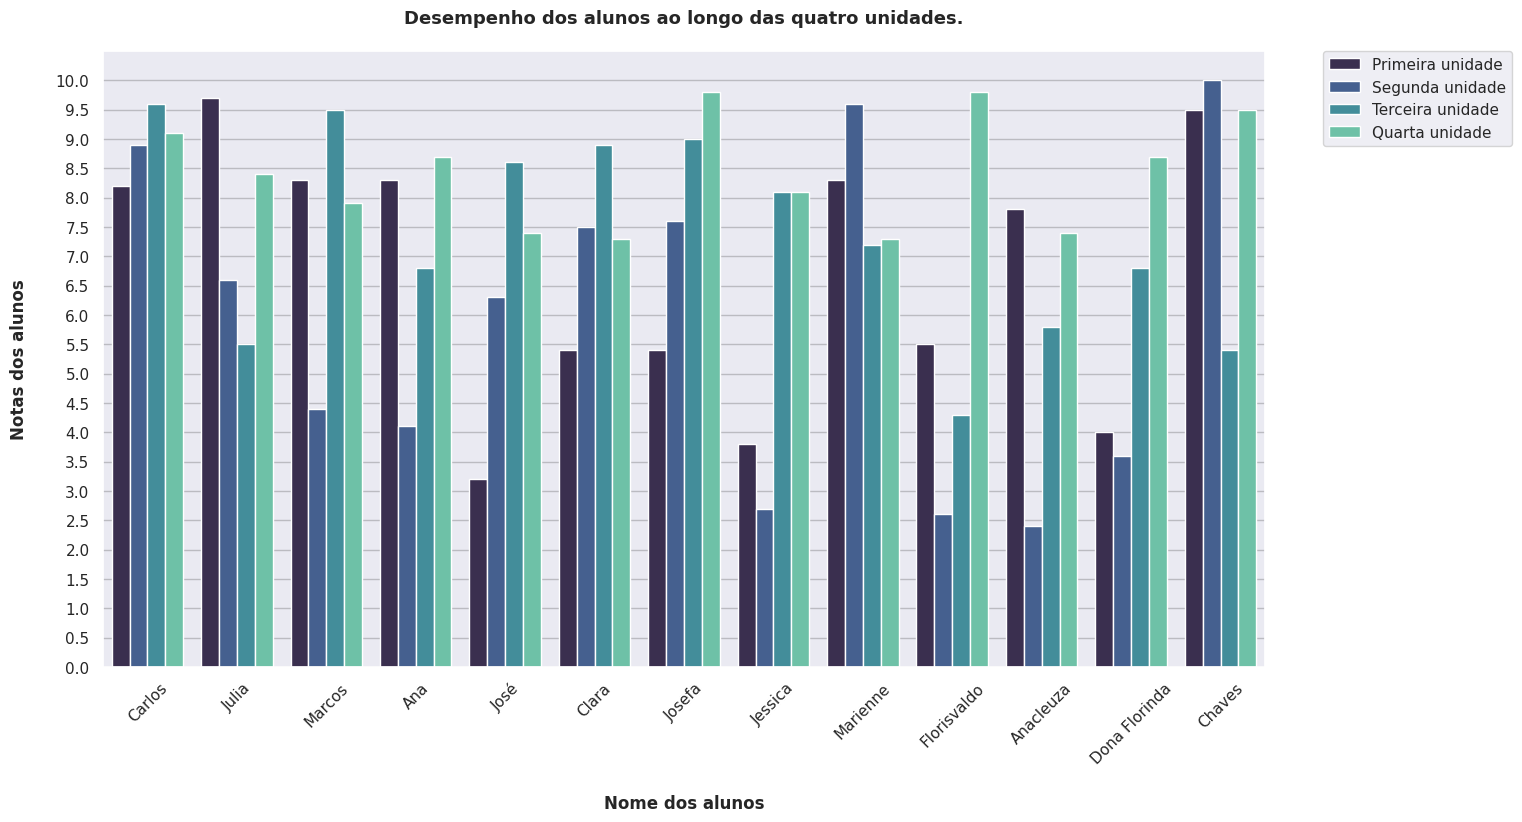

In [154]:
mapping = {
    'Prova_1' : 'Primeira unidade',
    'Prova_2' : 'Segunda unidade',
    'Prova_3' : 'Terceira unidade',
    'Prova_4' : 'Quarta unidade'
}
pandas['Unidade'] = pandas['Unidade'].map(mapping)
grafico_estilizado = pandas


plt.figure(figsize = (15, 8)) #Permite redimensionar a nossa visualização gráfica.
                              #Primeiro parâmetro sendo horizontal, segundo vertical.
sns.set_theme(style = 'darkgrid') #Modifico o tema de fundo do gráfico em questão.
sns.barplot(
    data = grafico_estilizado, #Dataframe que vamos utilizar
    x = 'Nome_Aluno', #Dados que queremos no eixo horizontal
    y = 'Nota', #Dados que queremos no eixo vertical
    hue = 'Unidade', #Ao incluir 'hue' fazemos com que o Seaborn divida os dados pela categoria escolhida.
    palette = 'mako', #Modifica a cor das barras, linhas do nosso gráfico com base no hue, apesar de não ser obrigatório o uso do Hue pra usar palette.
    errorbar = ('ci', 0) #Permite a remoção
    )

plt.title('Desempenho dos alunos ao longo das quatro unidades.', fontweight = 'bold', fontsize = 13, pad = 20) #Aqui eu realizo configurações referentes ao título.
plt.legend(bbox_to_anchor = (1.05, 1), borderaxespad = 0) # Já esta função nos auxilia na modificação da legenda que aparece quando usamos o Hue,
                                                                              # contudo é possível também retirar a legenda caso seja requerido.
                                                                              # O bbox_to_anchor(posição horizontal, posição vertical) serve para posicionar legenda.
plt.ylabel('Notas dos alunos', fontweight = 'bold', fontsize = 12, labelpad = 20) #Aqui eu realizo modificações no título do Eixo Vertical.
plt.xlabel('Nome dos alunos', fontweight = 'bold', fontsize = 12, labelpad = 20) #Aqui eu realizo modificações no título do Eixo Horizontal
plt.ylim(0, 10.5) #Modifico o limite do eixo Y.
plt.xticks(rotation = 45, fontsize = 11) #Nesta função eu modifico a rotação dos rótulos do eixo horizontal,
                                         #intervalo dos valores, além de também conseguir modificar a parte escrita.
plt.yticks(np.arange(0, 10.5, 0.5), rotation = 0, fontsize = 11) #Nesta função eu modifico a rotação dos rótulos do eixo vertical,
                                                                 #intervalo dos valores, além de também conseguir modificar a parte escrita.
plt.grid(visible = True, axis = 'y', linestyle = '-', alpha = 0.2, color = 'black')

plt.show() #Função que exibe o gráfico após todas as modificações.